In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
train=pd.read_csv(r"/kaggle/input/playground-series-s4e2/train.csv")
test=pd.read_csv(r"/kaggle/input/playground-series-s4e2/test.csv")

In [3]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
train.shape

(20758, 18)

In [7]:
train.replace('?',np.nan)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [8]:
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


<Axes: xlabel='Gender', ylabel='count'>

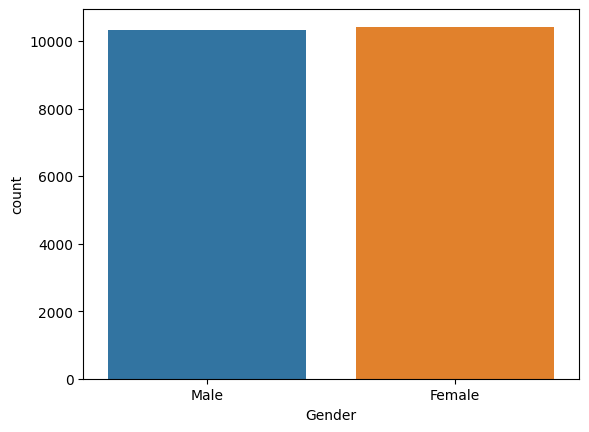

In [10]:
import seaborn as sns
sns.countplot(x="Gender", data=train)

<Axes: xlabel='family_history_with_overweight', ylabel='count'>

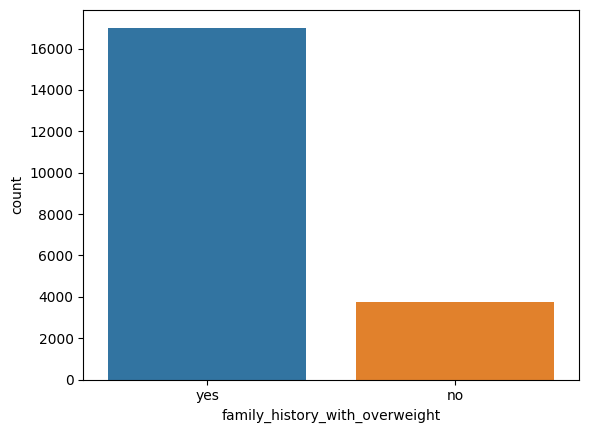

In [11]:
sns.countplot(x="family_history_with_overweight", data=train)

<Axes: xlabel='FAVC', ylabel='count'>

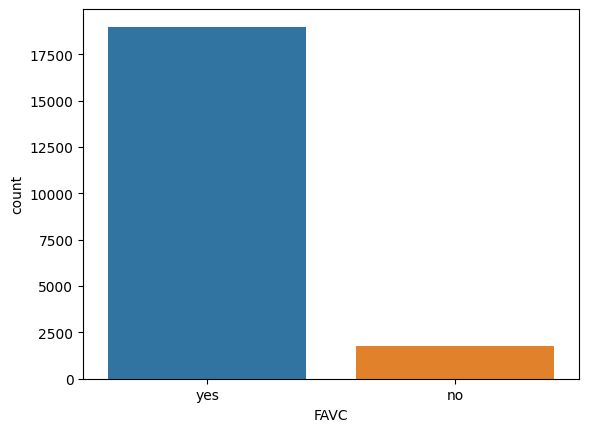

In [12]:
sns.countplot(x="FAVC", data=train)

<Axes: xlabel='CAEC', ylabel='count'>

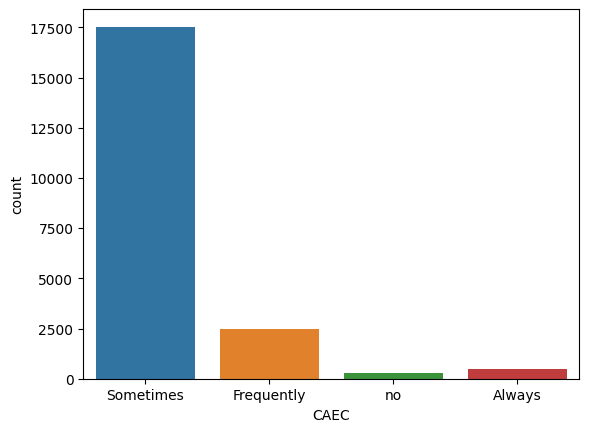

In [13]:
sns.countplot(x="CAEC", data=train)

In [14]:
train['CAEC'].value_counts()

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

In [15]:
train=train[~train['CAEC'].isin(['Always', 'no'])]

In [16]:
train.shape

(20001, 18)

<Axes: xlabel='SMOKE', ylabel='count'>

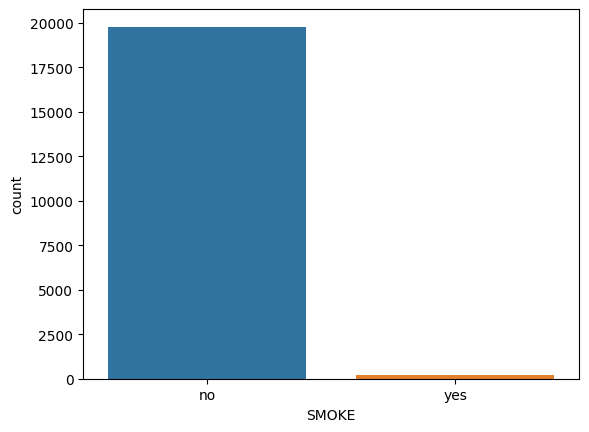

In [17]:
sns.countplot(x="SMOKE", data=train)

In [18]:
train=train.drop(['SMOKE'], axis=1)

In [19]:
train.shape

(20001, 17)

<Axes: xlabel='CALC', ylabel='count'>

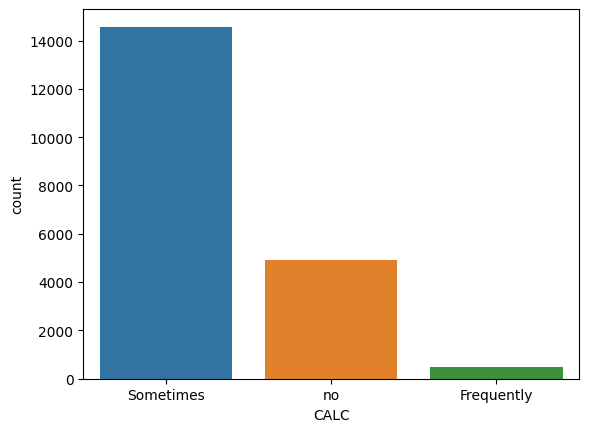

In [20]:
sns.countplot(x="CALC", data=train)

In [21]:
train['CALC'].value_counts()

CALC
Sometimes     14571
no             4932
Frequently      498
Name: count, dtype: int64

In [22]:
train=train[~train['CAEC'].isin(['Frequently'])]

In [23]:
train.shape

(17529, 17)

<Axes: xlabel='MTRANS', ylabel='count'>

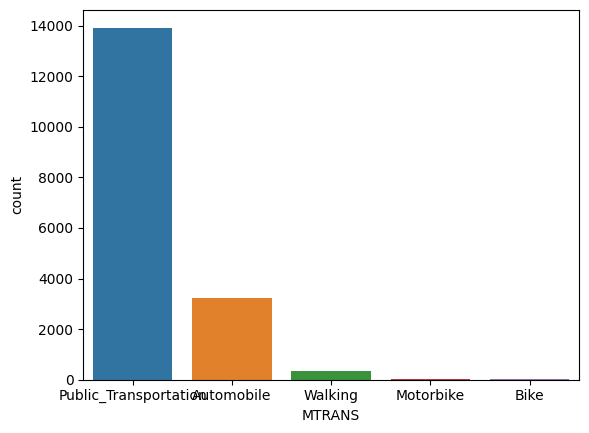

In [24]:
sns.countplot(x="MTRANS", data=train)

In [25]:
train['MTRANS'].value_counts()

MTRANS
Public_Transportation    13930
Automobile                3226
Walking                    325
Motorbike                   26
Bike                        22
Name: count, dtype: int64

In [26]:
train['MTRANS']=train['MTRANS'].replace(['Motorbike', 'Walking', 'Bike'], 'other')

In [27]:
train['MTRANS'].value_counts()

MTRANS
Public_Transportation    13930
Automobile                3226
other                      373
Name: count, dtype: int64

In [28]:
train=train[~train['MTRANS'].isin(['other'])]

In [29]:
train.shape

(17156, 17)

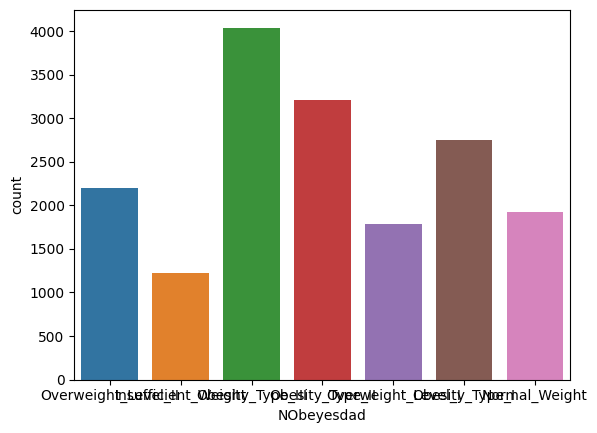

<Figure size 5000x1500 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
sns.countplot(x="NObeyesdad", data=train)
plt.figure(figsize=(50, 15))
plt.show()

In [31]:
train.shape

(17156, 17)

In [32]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17156 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17156 non-null  int64  
 1   Gender                          17156 non-null  object 
 2   Age                             17156 non-null  float64
 3   Height                          17156 non-null  float64
 4   Weight                          17156 non-null  float64
 5   family_history_with_overweight  17156 non-null  object 
 6   FAVC                            17156 non-null  object 
 7   FCVC                            17156 non-null  float64
 8   NCP                             17156 non-null  float64
 9   CAEC                            17156 non-null  object 
 10  CH2O                            17156 non-null  float64
 11  SCC                             17156 non-null  object 
 12  FAF                             17156

In [34]:
train.head(2)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight


In [35]:
def transform(data):
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    
    columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
    for col in columns:
        data[col]=le.fit_transform(data[col])
        
    return data

In [36]:
train=transform(train)

In [37]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0,2.763573,0,0.000000,0.976473,1,1,6
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0,1.910378,0,0.866045,1.673584,2,1,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0,1.674061,0,1.467863,0.780199,1,1,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0,1.979848,0,1.967973,0.931721,1,1,6
5,5,1,18.128249,1.748524,51.552595,1,1,2.919751,3.000000,0,2.137550,0,1.930033,1.000000,1,1,0


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17156 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17156 non-null  int64  
 1   Gender                          17156 non-null  int64  
 2   Age                             17156 non-null  float64
 3   Height                          17156 non-null  float64
 4   Weight                          17156 non-null  float64
 5   family_history_with_overweight  17156 non-null  int64  
 6   FAVC                            17156 non-null  int64  
 7   FCVC                            17156 non-null  float64
 8   NCP                             17156 non-null  float64
 9   CAEC                            17156 non-null  int64  
 10  CH2O                            17156 non-null  float64
 11  SCC                             17156 non-null  int64  
 12  FAF                             17156

<Axes: >

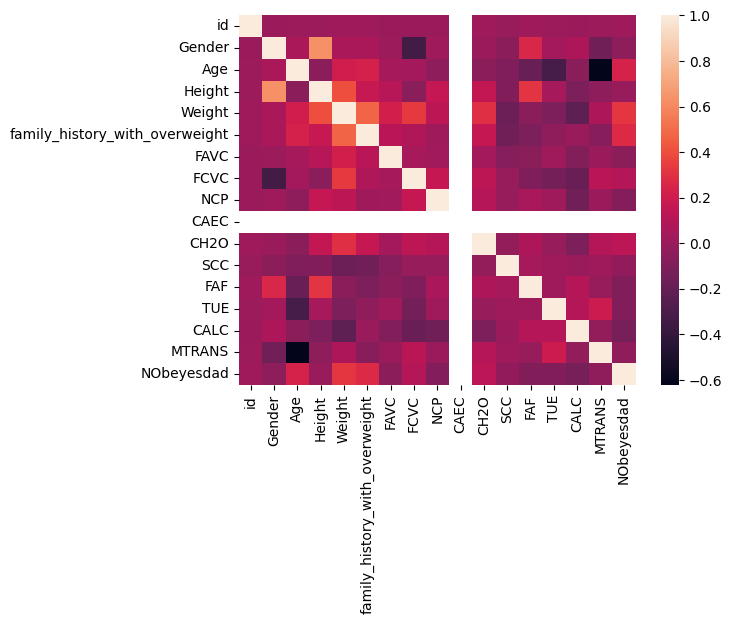

In [39]:
sns.heatmap(train.corr())

In [46]:
x=train.iloc[:, :16]
y=train.iloc[:, 16:]

In [47]:
x.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0,2.763573,0,0.000000,0.976473,1,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0,1.910378,0,0.866045,1.673584,2,1
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0,1.674061,0,1.467863,0.780199,1,1
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0,1.979848,0,1.967973,0.931721,1,1
5,5,1,18.128249,1.748524,51.552595,1,1,2.919751,3.000000,0,2.137550,0,1.930033,1.000000,1,1


In [48]:
y.head()

,NObeyesdad
0,6
2,0
3,4
4,6
5,0


In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13724, 16)
(3432, 16)
(13724, 1)
(3432, 1)


In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)
pred= model.predict(x_test)
print("Mode accuarcy: ", accuracy_score(pred, y_test))
print("Confusion matrix: \n", confusion_matrix(pred,y_test))
print("\nClassification report: \n", classification_report(pred,y_test))

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mode accuarcy:  0.30594405594405594
Confusion matrix: 
 [[ 58  35   0   0   0   5   4]
 [ 69 124  63   1   0  89  89]
 [ 26  37  19  18   0  28  42]
 [ 77 108  73  48   0  55  89]
 [ 19  69 393 562 790 173 210]
 [  0   0   0   0   0   0   0]
 [  1   7  22   0   0  18  11]]

Classification report: 
               precision    recall  f1-score   support

           0       0.23      0.57      0.33       102
           1       0.33      0.29      0.30       435
           2       0.03      0.11      0.05       170
           3       0.08      0.11      0.09       450
           4       1.00      0.36      0.53      2216
           5       0.00      0.00      0.00         0
           6       0.02      0.19      0.04        59

    accuracy                           0.31      3432
   macro avg       0.24      0.23      0.19      3432
weighted avg       0.71      0.31      0.40      3432



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

In [52]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(x_train, y_train)
pred= model.predict(x_test)
print("Mode accuarcy: ", accuracy_score(pred, y_test))
print("Confusion matrix: \n", confusion_matrix(pred,y_test))
print("\nClassification report: \n", classification_report(pred,y_test))


/tmp/ipykernel_265/612285536.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mode accuarcy:  0.9079254079254079
Confusion matrix: 
 [[228  17   0   0   0   4   0]
 [ 17 341   1   0   0  36   5]
 [  0   0 504  10   2  12  29]
 [  1   0  15 618   1   0   3]
 [  0   0   1   0 786   0   0]
 [  3  18  12   0   1 267  36]
 [  1   4  37   1   0  49 372]]

Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       249
           1       0.90      0.85      0.87       400
           2       0.88      0.90      0.89       557
           3       0.98      0.97      0.98       638
           4       0.99      1.00      1.00       787
           5       0.73      0.79      0.76       337
           6       0.84      0.80      0.82       464

    accuracy                           0.91      3432
   macro avg       0.89      0.89      0.89      3432
weighted avg       0.91      0.91      0.91      3432



In [53]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators= 100, learning_rate=0.1, random_state=42)
model.fit(x_train, y_train)
pred= model.predict(x_test)
print("Mode accuarcy: ", accuracy_score(pred, y_test))
print("Confusion matrix: \n", confusion_matrix(pred,y_test))
print("\nClassification report: \n", classification_report(pred, y_test))

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mode accuarcy:  0.9108391608391608
Confusion matrix: 
 [[233  19   0   0   0   4   0]
 [ 11 339   1   0   0  33   4]
 [  0   0 503   8   1   6  25]
 [  1   0  16 618   2   0   4]
 [  0   0   1   0 786   0   0]
 [  3  19   9   0   1 274  39]
 [  2   3  40   3   0  51 373]]

Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       256
           1       0.89      0.87      0.88       388
           2       0.88      0.93      0.90       543
           3       0.98      0.96      0.97       641
           4       0.99      1.00      1.00       787
           5       0.74      0.79      0.77       345
           6       0.84      0.79      0.81       472

    accuracy                           0.91      3432
   macro avg       0.90      0.89      0.89      3432
weighted avg       0.91      0.91      0.91      3432



In [54]:
test=pd.read_csv(r"/kaggle/input/playground-series-s4e2/test.csv")

In [55]:
test=test[~test['CAEC'].isin(['Always', 'no'])]

In [56]:
test=test.drop(['SMOKE'], axis=1)

In [57]:
test=test[~test['CAEC'].isin(['Frequently'])]

In [58]:
test['MTRANS']=test['MTRANS'].replace(['Motorbike', 'Walking', 'Bike'], 'other')

In [59]:
test=test[~test['MTRANS'].isin(['other'])]

In [60]:
def transform(data):
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    
    columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'CALC', 'MTRANS']
    for col in columns:
        data[col]=le.fit_transform(data[col])
        
    return data

In [61]:
test=transform(test)

In [62]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,0,2.825629,0,0.855400,0.000000,1,1
1,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,0,3.000000,0,1.000000,0.000000,1,1
2,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,0,2.621877,0,0.000000,0.250502,1,1
3,20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,0,2.786417,0,0.094851,0.000000,1,1
4,20762,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,0,2.653531,0,0.000000,0.741069,1,1


In [63]:
predictions= model.predict(test)

In [64]:
predictions

array([3, 5, 4, ..., 5, 1, 3])

In [65]:
submission= pd.DataFrame({
    'id':test['id'],
    'NObeyesdad': predictions
})

submission.to_csv('submission.csv', index=False)